# Proyek Analisis Data: [Air-quality-dataset_**PRSA_Data_Nongzhanguan_20130301-20170228**]
- **Nama:** [Syanindhia Tihta Pranasya]
- **Email:** [syanindhia22001@mail.unpad.ac.id]
- **ID Dicoding:** [MC011D5X1288]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Which year had the best air quality in Nongzhanguan based on PM2.5 levels (2013-2017), and what was the trend that year?
- Pertanyaan 2: Which factors play the most significant role in increasing air pollution in Nongzhanguan, and what proof backs up these claims?

## Import Semua Packages/Library yang Digunakan

Importing necessary libraries for data analysis and visualization:
- `numpy` → Numerical computations  
- `pandas` → Data manipulation and analysis  
- `matplotlib.pyplot` → Data visualization  
- `seaborn` → Statistical data visualization

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load the dataset using Pandas.  Then, display the first few rows to understand its structure.

In [35]:
#Read the dataset
Data = pd.read_csv("/content/PRSA_Data_Nongzhanguan.csv")
Data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- The PRSA_Data_Nongzhanguan dataset contains air quality data from early 2013 to February 2017 in Nongzhanguan.
- The dataset includes temporal data (year, month, day, hour), air pollution measurements (PM2.5, PM10, SO2, NO2, CO, O3), and meteorological factors (temperature, pressure, dew point, rain, wd-wind direction, and wspm-wind speed).

### Assessing Data


Assessing the data is an essential step to understand the structure and quality of the dataset.
`Data.info()` is used to get an overview of the dataset, including the number of entries, column names, and data types.

In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


`Data.isna().sum()` is used to identify missing values in each column.

In [37]:
Data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


`Data.duplicated().sum()` used to check for duplicate rows in the dataset

In [38]:
Data.duplicated().sum()

0

**Boxplots** is used to visually inspect outliers in numerical features.

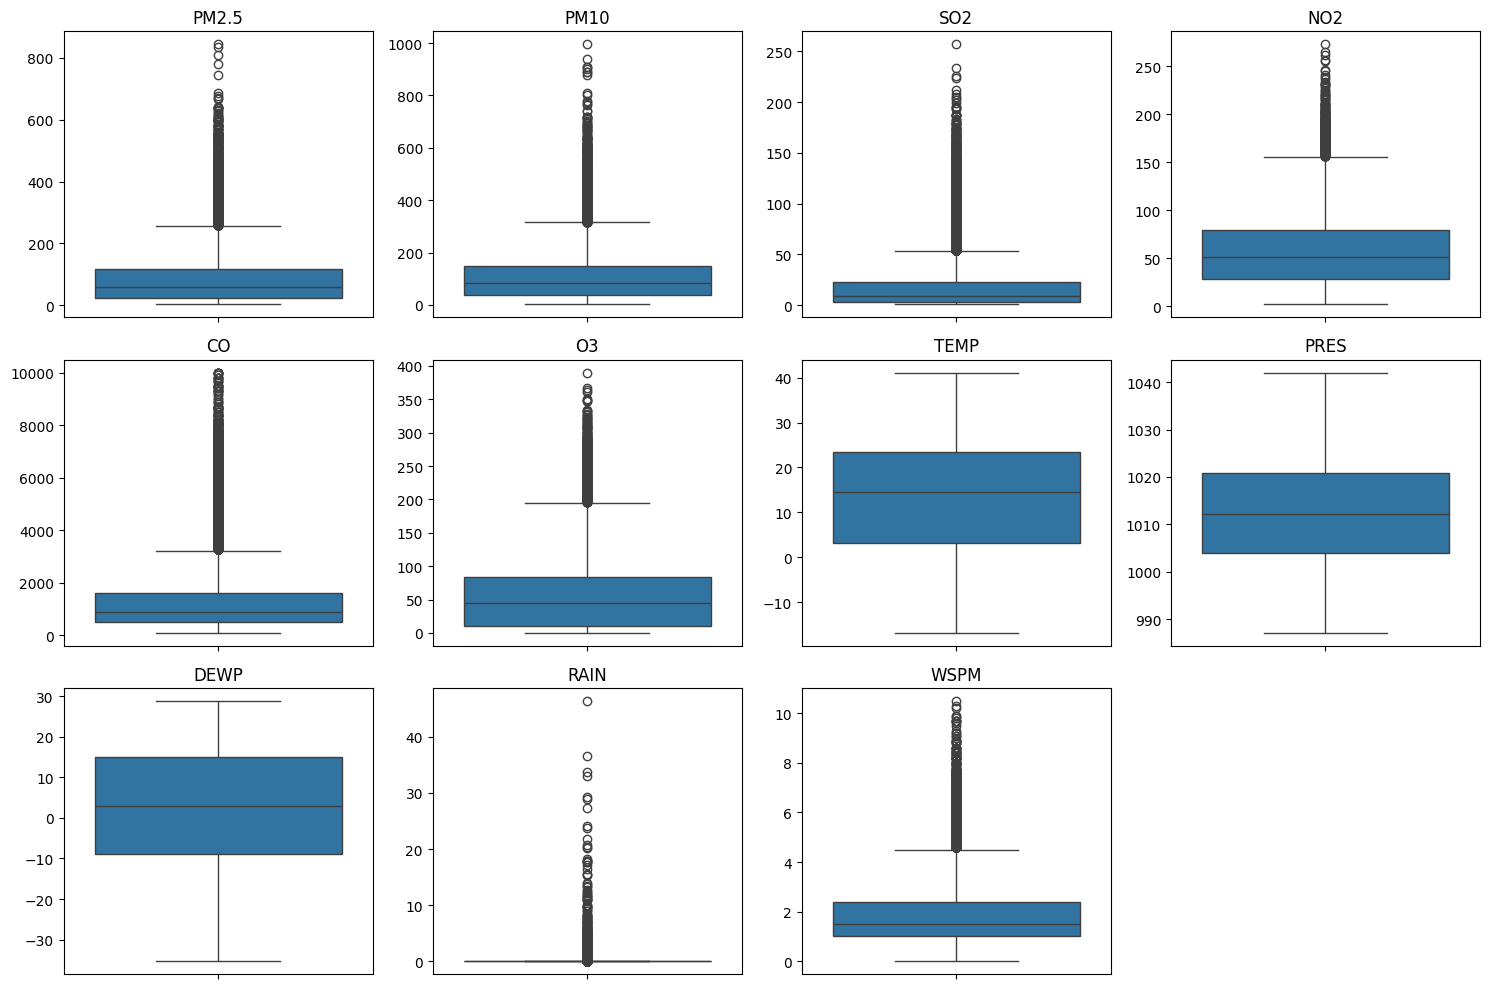

In [39]:
import matplotlib.pyplot as plt
# Check for outliers in all numerical factors using boxplots
numerical_factors = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

plt.figure(figsize=(15, 10))
for i, factor in enumerate(numerical_factors):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=Data[factor])
    plt.title(factor)
    plt.ylabel('')

plt.tight_layout()
plt.show()


**Insight:**
- The dataset contains 35064 entries and 18 columns.
- The dataset primarly consist of float64 (continious numerical values), int46 (temporal categories), and object data types.
- There are several variabels contain missing values.
 - PM2.5 has 628 missing values.
 - PM10 has 440 missing values.
 - SO2 has 446 missing values.
 - NO2 has 692 missing values.
 - CO	has 1206 missing values.
 - O3 has 506 missing values.
 - TEMP has 20  missing values.
 - PRES has 20 missing values.
 - DEWP has 20 missing values.
 - RAIN has 20 missing values.
 - wd has 78 missing values.
 - WSPM has	14 missing values.
- There are no duplicate records, ensuring good data quality in terms of redudancy.
- There are several key insights from the boxplots:
 - High Outliers in Pollutants (PM2.5, PM10, SO2, NO2, CO, and O3) show extreme values, indicating frequent pollution spikes.
 - Both PM2.5 and PM10 have heavily skewed distributions, suggesting serious particulate matter pollution.
 - CO has significant outliers, likely due to traffic or industrial emissions.
 - Low rainfall and weak winds may contribute to pollutant accumulation.
 - Temperature, pressure, and dew point appear more balanced, but their effect on pollution requires further analysis.

### Cleaning Data

Using a different approach depending on the data type:
- Categorical columns (object data type) are filled with the most frequent value (mode).  
- Numerical columns (integer or float data types) are filled with the mean value of the column.  


In [40]:
for col in Data.columns:
    if Data[col].dtype == 'object':
        Data[col] = Data[col].fillna(Data[col].mode()[0])
    elif Data[col].dtype in ['int64', 'float64']:
        Data[col] = Data[col].fillna(Data[col].mean())

Data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [41]:
Data.to_csv('imputed_Nongzhanguan.csv', index=False)

**Insight:**
- After applying the missing value handling process, the dataset no longer contains any missing values.

## Exploratory Data Analysis (EDA)

### Explore

`data.describe(include="all")` is used to generate descriptive statistics for both numerical and categorical columns in the dataset.
- For numerical columns, it provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values.  
- For categorical columns, it returns the count, number of unique values, most frequent value (top), and its frequency (freq).  

In [52]:
Data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.449681,94.741078,24.125746,35.937771,1223.564865,57.978516,11.45515,10.263131,13.806757,0.786058,NaN,1.280113,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.000000,30.000000,500.000000,10.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,9.000000,52.000000,1000.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,148.000000,23.000000,79.000000,1600.000000,83.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


`Dataset.hist(figsize=(10, 8))` is used to generate histograms for all numerical variables in the dataset.

<Figure size 1000x800 with 0 Axes>

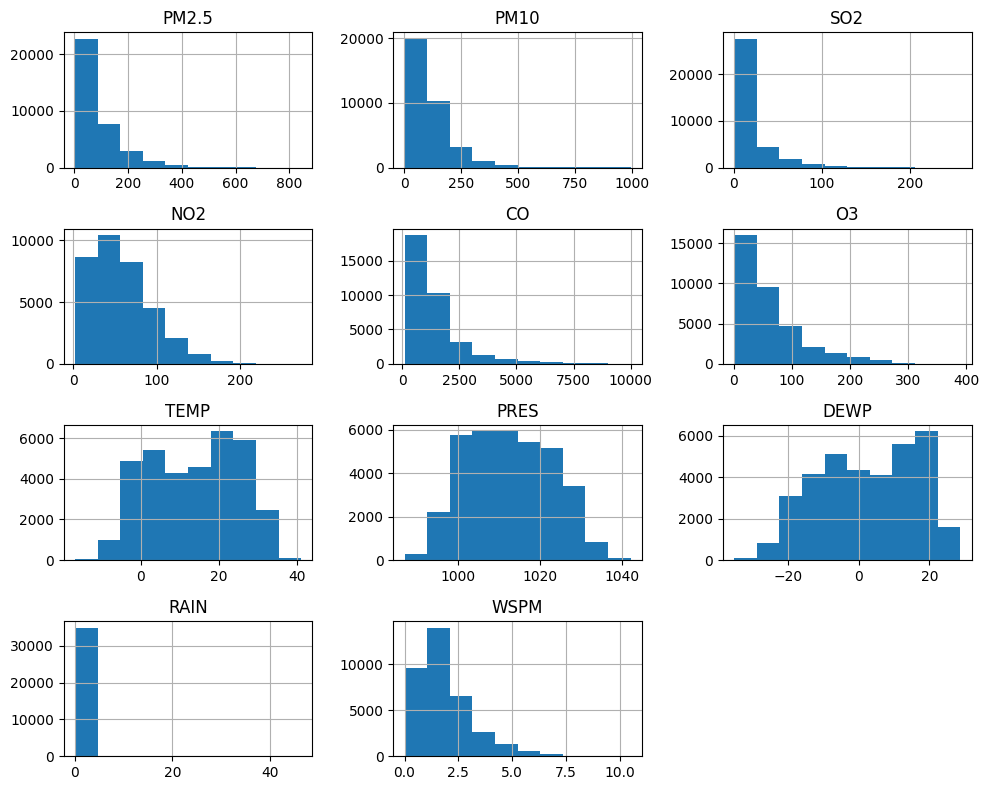

In [43]:
Dataset = Data[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
plt.figure(figsize=(10, 8))
Dataset.hist(figsize=(10, 8))
plt.tight_layout()

`Dataset.corr()` is used to compute the correlation matrix between numerical variables in the dataset.


In [44]:
Dataset.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.901011,0.529772,0.684396,0.797075,-0.186989,-0.171977,0.028071,0.097283,-0.022373,-0.297297
PM10,0.901011,1.000000,0.519054,0.672898,0.727415,-0.160649,-0.144708,-0.002086,0.050662,-0.033062,-0.203172
SO2,0.529772,0.519054,1.000000,0.496187,0.558351,-0.189873,-0.357287,0.231105,-0.265643,-0.045467,-0.152398
NO2,0.684396,0.672898,0.496187,1.000000,0.695094,-0.521074,-0.299884,0.128352,-0.019145,-0.052387,-0.463579
CO,0.797075,0.727415,0.558351,0.695094,1.000000,-0.312055,-0.314761,0.148645,-0.018696,-0.013425,-0.334335
O3,-0.186989,-0.160649,-0.189873,-0.521074,-0.312055,1.000000,0.604394,-0.454042,0.312927,0.024109,0.310396
TEMP,-0.171977,-0.144708,-0.357287,-0.299884,-0.314761,0.604394,1.000000,-0.837480,0.819070,0.038660,0.048829
PRES,0.028071,-0.002086,0.231105,0.128352,0.148645,-0.454042,-0.837480,1.000000,-0.770305,-0.065779,0.038493
DEWP,0.097283,0.050662,-0.265643,-0.019145,-0.018696,0.312927,0.819070,-0.770305,1.000000,0.089356,-0.278895
RAIN,-0.022373,-0.033062,-0.045467,-0.052387,-0.013425,0.024109,0.038660,-0.065779,0.089356,1.000000,0.025547


**Insight:**
- Data describe
 - There are total  35,064 observations in the dataset.
 - There are 16 different wind directions in the dataset, covering the full compass system—north, south, east, west, and everything in between (like NE, SW, ENE, etc.). With the most common wind direction is ENE (East-Northeast), showing up 3,939 times.
 - All 35,064 observations were collected only from the Nongzhanguan monitoring station.
- Data distribution
 - Air pollutants (PM2.5, PM10, SO2, NO2, CO, O3) are right-skewed, indicating occasional extreme pollution events.
 - TEMP & DEWP follow a normal distribution, reflecting seasonal variation.
 - PRES is slightly skewed, mostly around 1010-1020 hPa.
 - WSPM is right-skewed, suggesting predominantly calm conditions with occasional strong winds.
- Data correlation
 - CO and NO2 strongly correlate with PM2.5 and PM10, linking emissions to increased pollution.
 - TEMP negatively correlates with PM2.5, PM10, NO2, and CO, suggesting lower pollution at higher temperatures.
 - PRES negatively correlates with TEMP, indicating higher pressure is associated with lower temperatures.
 - O3 negatively correlates with NO2 and CO, reflecting its photochemical formation from NO2 under sunlight.
 - WSPM negatively correlates with pollutants, showing wind aids in pollution dispersion.
 - RAIN has a weak correlation with pollutants, suggesting minimal impact on pollutant removal.

 ### Data Grouping

#### Data Year

`Data_year.groupby(by='year').mean()` is used to calculate the average values of all numerical features for each year.

In [45]:
Data_year = Data[['year']].join(Dataset)
Data_year.groupby(by='year').mean()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,
2013,84.350177,103.845434,23.238118,59.624706,1306.107784,56.309899,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,90.185522,125.105613,24.437320,61.958084,1336.974058,59.567559,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,85.932337,107.457277,15.913632,58.506678,1377.260118,61.217834,13.432386,1012.789625,2.692271,0.072880,1.934751
2016,76.155790,97.038275,11.604206,52.514671,1214.198103,60.179288,13.863387,1012.824316,2.287094,0.079753,1.859347
2017,101.386979,119.624149,20.659014,58.386465,1696.858939,36.882272,0.775014,1023.513139,-13.070323,0.003605,1.959623


`Data_year.groupby(by='year').agg({...})` is used to compute multiple aggregate statistics for selected numerical features over different years.

In [46]:
Data_year.groupby(by='year').agg({
    'PM2.5': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO' : 'mean',
    'TEMP': ['mean','max', 'min'],
})

PM2.5        SO2        NO2           CO       TEMP            
            mean       mean       mean         mean       mean   max   min
year                                                                      
2013   84.350177  23.238118  59.624706  1306.107784  15.963657  37.5  -8.5
2014   90.185522  24.437320  61.958084  1336.974058  13.881153  41.1 -11.5
2015   85.932337  15.913632  58.506678  1377.260118  13.432386  38.8 -10.0
2016   76.155790  11.604206  52.514671  1214.198103  13.863387  37.3 -16.8
2017  101.386979  20.659014  58.386465  1696.858939   0.775014  15.9  -9.7

#### Data 2016

`Data_month_2016.groupby(by='month').mean()` is used to compute the average values of selected numerical features for each month in the year 2016.

In [47]:
Data_2016 = Data[Data['year'] == 2016]
Data_month_2016 = Data_2016[['month']].join(Dataset)
DM_2016 = Data_month_2016.groupby(by='month').mean()
DM_2016

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,
1,70.320802,79.889785,22.526882,60.651882,1521.505376,34.696237,-4.550000,1025.950000,-18.059677,0.000672,2.115054
2,43.411892,53.647963,16.610729,41.563637,901.829096,50.219259,1.398420,1022.559770,-15.088218,0.018103,2.449138
3,93.811477,131.339934,21.452486,67.493204,1258.788042,49.823859,9.201882,1016.740054,-8.752688,0.000000,2.049866
4,71.593409,107.676228,11.555650,51.199016,787.601459,70.750839,16.454722,1007.811667,-0.332917,0.006667,2.382361
5,54.974804,84.915179,10.121567,45.012880,677.641469,96.178324,21.672849,1005.541398,6.201882,0.045833,2.207796
6,61.646774,76.576389,5.977440,40.384548,817.980696,111.517698,25.735833,1000.761944,14.683472,0.099167,1.803056
7,70.854663,76.002640,3.960695,39.594739,1024.287321,100.009595,27.699462,1000.635349,20.727285,0.423387,1.698925
8,49.208116,59.397849,3.594086,38.202266,930.903498,88.749375,27.863306,1003.590054,19.286828,0.072446,1.618414
9,61.059894,75.041395,5.037483,46.230725,852.471120,60.851445,22.114497,1009.356989,13.906157,0.160484,1.550700


`max_month = DM_2016['PM2.5'].idxmax()` and `min_month = DM_2016['PM2.5'].idxmin()` is used to determine the months with the highest and lowest average PM2.5 levels in 2016, while `print(DM_2016.sort_values(by=['PM2.5'], ascending=False))` used to sort the data by PM2.5 values in descending order.

In [48]:
max_month = DM_2016['PM2.5'].idxmax()
min_month = DM_2016['PM2.5'].idxmin()

print(f"Month dengan PM2.5 tertinggi: {max_month}")
print(f"Month dengan PM2.5 terendah: {min_month}")

print(DM_2016.sort_values(by=['PM2.5'], ascending=False))

Month dengan PM2.5 tertinggi: 12
Month dengan PM2.5 terendah: 2
            PM2.5        PM10        SO2        NO2           CO          O3  \
month                                                                          
12     144.197095  165.342479  19.582300  81.213465  2623.093825   19.861520   
11     104.937992  145.143056  12.826389  65.742072  1900.589375   15.893798   
3       93.811477  131.339934  21.452486  67.493204  1258.788042   49.823859   
10      85.566336  107.212318   5.972283  51.971344  1237.463778   23.547136   
4       71.593409  107.676228  11.555650  51.199016   787.601459   70.750839   
7       70.854663   76.002640   3.960695  39.594739  1024.287321  100.009595   
1       70.320802   79.889785  22.526882  60.651882  1521.505376   34.696237   
6       61.646774   76.576389   5.977440  40.384548   817.980696  111.517698   
9       61.059894   75.041395   5.037483  46.230725   852.471120   60.851445   
5       54.974804   84.915179  10.121567  45.012880   67

**Insight:**
- Yearly data shows a declining trend in PM2.5 and PM10, reaching the lowest levels in 2016.
- Monthly PM2.5 levels in 2016 follow a strong seasonal pattern, peaking in winter due to low temperatures, high pressure, and low wind speed, which contribute to pollutant accumulation and reduced dispersion in the atmosphere.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which year had the best air quality in Nongzhanguan based on PM2.5 levels (2013-2017), and what was the trend that year?

`DY_PM25 = Data_year.groupby('year')['PM2.5'].mean()` is used to compute the yearly average of PM2.5. Then plot the trend using a line chart using `plt.figure` ~ `plt.show`. `best_air_quality_year = DY_PM25.idxmin()` used to find the year with the best air quality (lowest PM2.5 level).

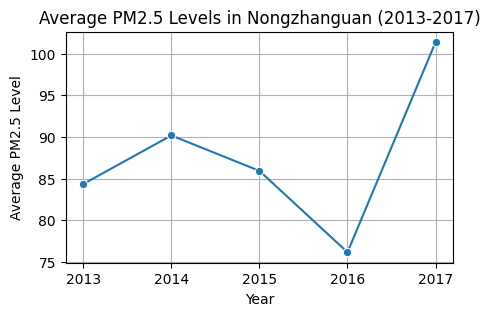

The year with the best air quality (lowest average PM2.5) was 2016


In [49]:
DY_PM25 = Data_year.groupby('year')['PM2.5'].mean()

plt.figure(figsize=(5, 3))
sns.lineplot(x=DY_PM25.index, y=DY_PM25.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Average PM2.5 Levels in Nongzhanguan (2013-2017)')
plt.xticks(DY_PM25.index)
plt.grid(True)
plt.show()

best_air_quality_year = DY_PM25.idxmin()
print(f"The year with the best air quality (lowest average PM2.5) was {best_air_quality_year}")

The following code is used to visualize monthly trend of PM2.5 level in Nongzhanguan in year 2016.

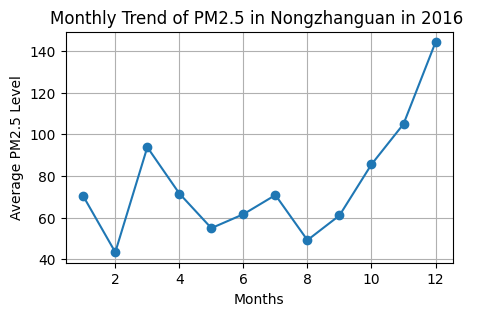

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(DM_2016.index, DM_2016['PM2.5'], marker='o')
plt.title('Monthly Trend of PM2.5 in Nongzhanguan in 2016 ')
plt.xlabel('Months')
plt.ylabel('Average PM2.5 Level')
plt.grid(True)
plt.show()

### Pertanyaan 2: Which factors play the most significant role in increasing air pollution in Nongzhanguan, and what proof backs up these claims?

The following code is used to visualize the correlation between different air quality and weather factors in Nongzhanguan for 2016 using a heatmap.  

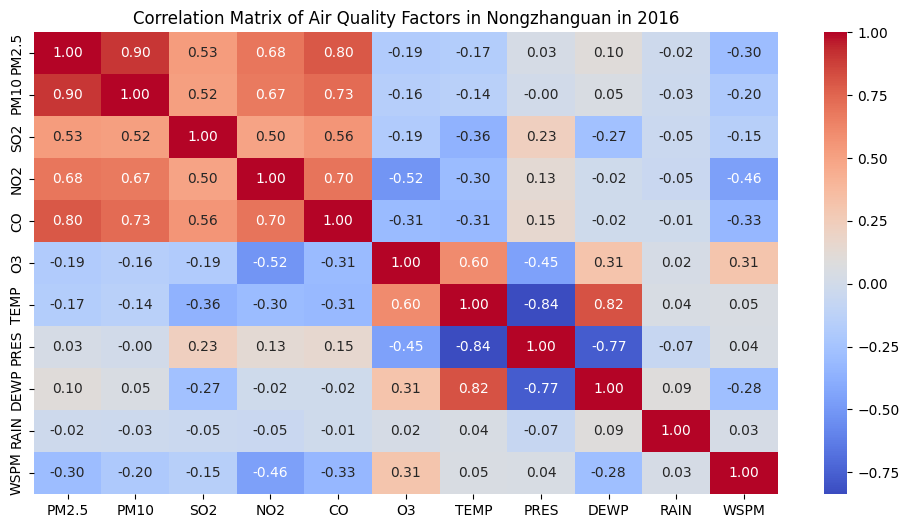

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(Dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Factors in Nongzhanguan in 2016')
plt.show()

**Insight:**
- Pertanyaan 1: Which year had the best air quality in Nongzhanguan based on PM2.5 levels (2013-2017), and what was the trend that year?
 - Based on the graph, **2016** had the **lowest average PM2.5** concentration, indicating **the best air quality** among the years analyzed.
 - PM2.5 concentrations are significantly higher towards the end of the year, peaking in December, possibly due to increased heating activities, lower temperatures, and weaker air circulation.
 - PM2.5 concentrations are lower in mid-year, around summer, possibly due to improvised atmospheric dispersion.
 - Air quality in Nongzhanguan worsens significantly in winter, suggesting that **seasonal** factors play a major role in PM2.5 concentration levels.

- Pertanyaan 2: Which factors play the **most significant role** in increasing air pollution in Nongzhanguan, and what proof backs up these claims?
 - Industrial and Vehicular Emissions: **CO** and **NO2** show strong positive correlations with PM2.5 and PM10, indicating that industrial and vehicular emission are major contributors to particulate pollution.
 - Temperature (**TEMP**) and Wind Speed (**WSPM**) show negative correlations with PM2.5, PM10, CO, and NO2, indicating that higher temperature and stronger winds are associated with lower pollution levels. Possibily due to lower temperature hardly trapping pollutants near the surface and stronger winds help disperse pollutants.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
 - 2016 had the best air quality, with the lowest PM2.5 levels. Air pollution showed seasonal variations, increasing significantly in winter and decreasing in summer.
- Conclution pertanyaan 2
 - Industrial and vehicular emissions were major contributors to air pollution, as evidenced by the strong positive correlation between CO, NO2, and PM2.5/PM10. Additionally, temperature and wind speed had negative correlations with pollution levels, suggesting that higher temperatures and stronger winds help reduce pollutant accumulation.